# Data Imputation using PCA/Probabilstic PCA
#### We  implement data imputation using Principal Component Analysis (PCA) and Probabilistic PCA (PPCA).
1.  We implement PCA for data imputation from scratch with the following steps:
 • Replace missing values with the column mean (mean value imputation).
 • Perform low-rank approximation using Singular Value Decomposition (SVD from numpy.linalg.svd).
 • Use the low-rank approximation to reconstruct the dataset with imputed values. Low-rank approximation: Xapprox = UdΣdVdT where Ud, Σd, Vd are the truncated matrices obtained from SVD.

2.  We implement Probabilistic PCA (PPCA) for data imputation using the Coordinate Descent Expectation-Maximization (EM) algorithm.
3.  We compute the Mean Squared Error (MSE) between the original data and the imputed data for both PCA and PPCA methods. Report the results.

4.  We visualize the original data and the imputed data (from PCA and PPCA) separately in the space of the first two principal components. Using scatter plots for the visualization.


In [31]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_csv('original_data.csv')

df_imputed=df.fillna(df.mean())
display(df_imputed)
df_imputed.to_numpy()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,-0.495025,-1.828784,0.484103,-0.675546,-0.898146,3.854634,0.211292,-1.213034,-1.591801,1.377596,1.248948,0.682170,-0.395264,0.762453,-1.527405,-0.374632,1.196992,-1.306331,0.085841,0.341454
1,1.572605,5.609611,1.258050,-2.710722,5.330489,-0.507486,-1.518172,3.117454,-0.826710,-2.202605,-2.116488,-3.011285,-0.949918,-2.036520,-0.669789,3.549608,0.611573,-2.731356,-1.275779,-1.001745
2,2.616901,4.261994,0.301002,1.028790,-3.112026,-2.616478,2.593676,2.721725,-2.561418,-6.133803,2.977547,-1.433439,0.923350,-0.121466,-3.324676,-3.030175,-5.018495,2.340915,-1.779689,0.415106
3,0.443332,0.870012,-0.797231,-0.155762,-3.617511,-0.098306,2.234152,1.021534,-1.360889,-3.225149,4.436982,1.536011,1.207196,1.776864,-3.614136,-2.872038,-3.236130,2.290866,-1.451132,0.555509
4,1.948537,1.031874,1.790242,0.843061,-0.851746,-1.911716,2.934651,1.318511,-1.916941,-1.428030,-1.807589,0.892999,-1.795327,-1.588515,-1.188375,-3.981970,-1.738190,0.672087,1.372024,-4.701225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.241684,1.609575,0.714715,-3.311556,1.514947,-3.032431,2.621765,3.763439,2.088520,0.596595,0.994599,1.684766,-3.417442,-0.032068,2.136908,1.296188,-0.118653,0.315647,1.352926,-3.073704
496,1.209748,9.926777,1.147613,-3.305406,5.515953,0.423397,-0.256390,4.494174,-2.919338,-5.413179,1.282219,-6.031317,-0.457613,-1.057905,-4.482784,4.057691,-1.046775,-1.216253,-2.763542,-0.866158
497,1.914590,1.497429,1.422863,2.893547,-2.895772,1.556814,0.346897,-1.117234,-4.878257,-2.401751,1.390154,-0.172485,0.417654,-0.003057,-4.298005,-4.588256,-1.706243,-0.433550,-0.059236,-0.518406
498,-0.567983,-3.317368,-0.520979,1.651406,-3.058952,4.044744,-0.686676,-2.994361,-2.477969,-0.291143,1.593148,1.471482,2.327603,2.207379,-1.461481,-3.561540,0.978429,-0.506929,-1.169231,1.815933


array([[-0.49502456, -1.82878363,  0.4841028 , ..., -1.30633066,
         0.08584068,  0.34145413],
       [ 1.57260501,  5.60961097,  1.25805029, ..., -2.73135564,
        -1.2757793 , -1.00174493],
       [ 2.61690054,  4.26199367,  0.30100245, ...,  2.3409154 ,
        -1.77968898,  0.41510584],
       ...,
       [ 1.91459015,  1.49742945,  1.42286307, ..., -0.43355027,
        -0.05923609, -0.51840571],
       [-0.56798275, -3.31736756, -0.52097903, ..., -0.50692899,
        -1.16923107,  1.81593288],
       [-0.7891745 , -3.61154383,  0.10443142, ..., -1.09058503,
         1.72809394, -0.61361309]], shape=(500, 20))

In [32]:
df2=df.copy()
df2=df2.to_numpy()


for i in range(df2.shape[1]):
    col_mean=np.nanmean(df2[:, i])
    df2[np.isnan(df2[:, i]), i]=col_mean

#Fitting the Data
def centering(x, mean):
    movement=x-mean
    return movement
for i in range(df2.shape[1]):
    mean_aux=np.mean(df2[:, i])
    df2[:, i]=centering(df2[:, i], mean_aux) 

#Performing SVD
U, S, VH= np.linalg.svd(df2, full_matrices=False)
print("df2",np.shape(df))
print("U",np.shape(U))
print("S",np.shape(S))
print("VH",np.shape(VH))

#Xapprox = UdΣdVdT

US = np.dot(U,np.diag(S))
print("US",np.shape(US))

USVHT = np.dot(US,(VH.T))
print("USVHT",np.shape(USVHT))

X_approx_pca=USVHT

#instructions say outer, but that fails as np.outer is for vectors
#Notes to self:
#np.dot: dot product or matrix multiplication
#np.matmul or @: matrix multiplication
#np.outer: outer of vectors (1D arrays) and returns a 2D array
#np.inner: inner product or sum of element-wise multiplication
#np.multiply or *: element by element multiplication


df2 (500, 20)
U (500, 20)
S (20,)
VH (20, 20)
US (500, 20)
USVHT (500, 20)


In [ ]:

#W =(SUM(xn − μ)znT) * ((SUM(zn*znT) )^−1), but for this i need zn
#zn = ((WTW + (σ^2) * I )^−1) * (WT (xn − μ)), but for this i need W

#they need each other, so first i need to initialize them
xn=df2.T
W=VH #just to initialize W, initialized
sigma=1 #σ initialized
miu= np.mean(df2, axis=0) #initialized
N_points, M_dimensions= df2.shape
zn= np.zeros((W.shape[1], N_points)) #initialized
I= np.eye(W.shape[1])
WTW= W.T@W

zn= np.linalg.inv((WTW + sigma**2)*I)@W.T@xn
#print(zn)

#initialized, now i can iterate
iterations=10

for i in range(iterations):
    zn=np.linalg.inv(W.T @ W + sigma**2 * np.eye(W.shape[1])) @ W.T @ (df2.T)
    W_new=(df2.T @ zn.T) @ np.linalg.inv(zn @ zn.T)
    sigma2_new=np.mean(np.sum((df2.T - W_new @ zn)**2, axis=0))
    W=W_new
    sigma2=(sigma2_new)**0.5
X_approx_ppca=(W @ zn).T + miu

df2[np.isnan(df2)] = X_approx_ppca[np.isnan(df2)]


In [34]:
print("MSE FOR PPCA",np.mean((df2-X_approx_ppca) ** 2 ))

print("MSE FOR PCA",np.mean((df2-X_approx_pca) ** 2 ))

MSE FOR PPCA 2.8568914970555554e-28
MSE FOR PCA 12.096559807430653


MSE FOR PPCA 2 components 6.774705273567968e-27


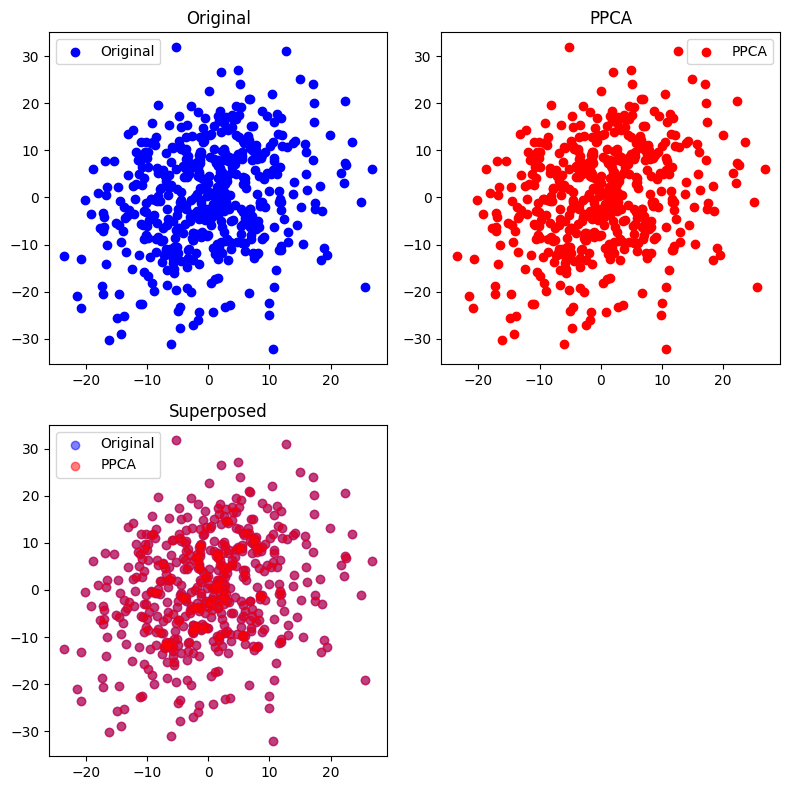

In [35]:

#take two principal

W_2 = W[:, :2]

X_ppca_2 = np.dot(X_approx_ppca, W_2) 

X_original_2 = np.dot(df2, W_2)

print("MSE FOR PPCA 2 components",np.mean((X_original_2-X_ppca_2) ** 2 ))

#fig 1 side by side
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.scatter(X_original_2[:, 0], X_original_2[:, 1], color="blue",  label="Original")
plt.legend()
plt.subplot(2, 2, 2)
plt.scatter(X_ppca_2[:, 0], X_ppca_2[:, 1], color="red", label="PPCA")
plt.title("PPCA")

plt.legend()
plt.tight_layout()

#superposed
plt.subplot(2, 2, 3)
plt.scatter(X_original_2[:, 0], X_original_2[:, 1], color="blue", label="Original", alpha=0.5)
plt.scatter(X_ppca_2[:, 0], X_ppca_2[:, 1], color="red", label="PPCA", alpha=0.5)
plt.title("Superposed")
plt.legend()
plt.tight_layout()
plt.show()


MSE FOR PCA 2 components 39.96911776467828


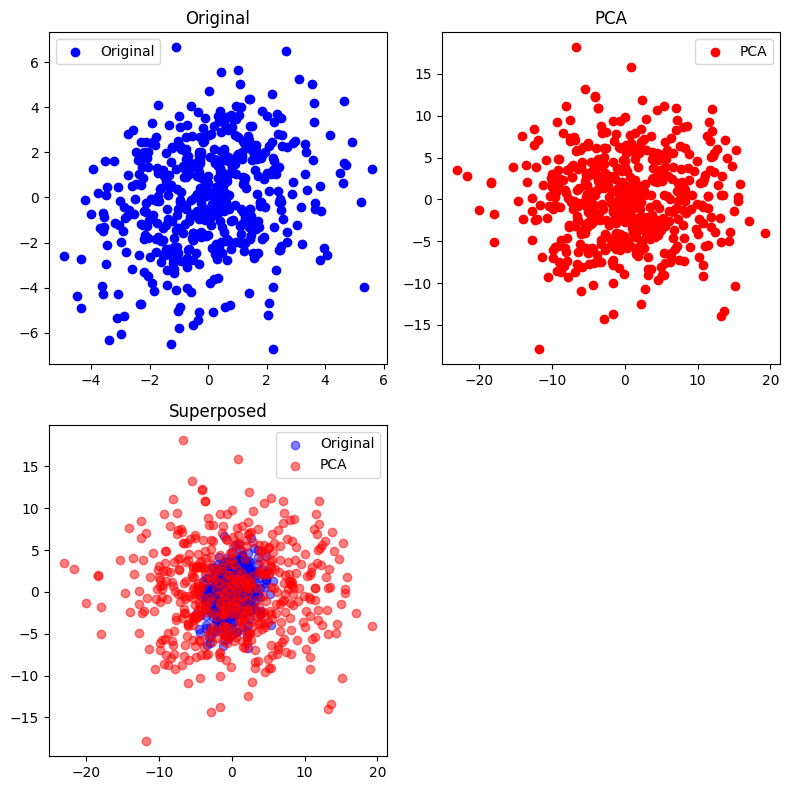

In [36]:
#take two principal

VH_2 = VH[:, :2]

X_pca_2 = np.dot(X_approx_pca, VH_2) 

X_original_2 = np.dot(df2, VH_2)

print("MSE FOR PCA 2 components",np.mean((X_original_2-X_pca_2) ** 2 ))


#fig 1 side by side
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.scatter(X_original_2[:, 0], X_original_2[:, 1], color="blue",  label="Original")
plt.legend()
plt.subplot(2, 2, 2)
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color="red", label="PCA")
plt.title("PCA")

plt.legend()
plt.tight_layout()

#superposed
plt.subplot(2, 2, 3)
plt.scatter(X_original_2[:, 0], X_original_2[:, 1], color="blue", label="Original", alpha=0.5)
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color="red", label="PCA", alpha=0.5)
plt.title("Superposed")
plt.legend()
plt.tight_layout()
plt.show()

### 2 Dimensionality Reduction using Kernel PCA (5 points)
#### We will implement Kernel PCA from scratch to perform non-linear dimensionality reduction.  With the following steps:

1. We use a synthetic dataset with non-linear structure and visualize the data. from sklearn.datasets import make_circles
2. Implement Kernel PCA:
• Define the Radial Basis Function kernel to compute pairwise similarities.
• Center the kernel matrix K to ensure it has zero mean.
• Perform eigenvalue decomposition on the centered kernel matrix K′. Extract the top d eigenvalues and corresponding eigenvectors.
• Project the data into the reduced-dimensional space.

3. Create a scatter plot to visualize the transformed dataset in the 2D space of the first two
components.

In [37]:
from sklearn.datasets import make_circles
#https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_circles.html
X, Y= make_circles(n_samples=200, noise=0.1, factor=0.3)

#rbf : k(x, y) = exp(−∥x − y∥**2 /  2σ**2)
def rbf(x, sigma):
    N=x.shape[0]
    K=np.ones((N, N))
    for i in range(N):
        for j in range(N):
            distance=x[i]-x[j]
            sq_distance = np.dot(distance, distance)
            K[i, j]=np.exp(-sq_distance / (2*(sigma**2)))
    return K


#H :=(I − 1/N  *1l) where 1l is NxN a matrix of ones
def kernel_matrix(x, k):
    N=x.shape[0]
    H=np.eye(N) - (1/N) * np.ones((N, N))
    K_tilde=H@k@H
    return K_tilde


#eigenvalue decomposition on the centered kernel matrix K′, extract the top d eigenvalues and corresponding eigenvectors
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
def eigen_decomp(k_tilde,d):
    eigenvalues, eigenvectors=np.linalg.eig(k_tilde)
    sort_index=np.argsort(eigenvalues)
    #print(sort_index)
    sort_index=sort_index[::-1] #flip it around
    #print(np.shape(eigenvalues))
    #print(np.shape(eigenvectors))
    eigenvalues, eigenvectors=eigenvalues[sort_index], eigenvectors[:, sort_index]
    d_eigenvalues=eigenvalues[:d]
    d_eigenvectors=eigenvectors[:, range(d)]
    projections=np.dot(k_tilde, d_eigenvectors)
    return projections



C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


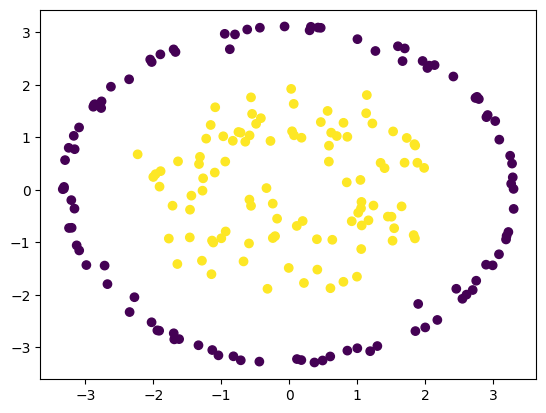

In [38]:
K=rbf(X, 1)
K_tilde=kernel_matrix(X,K)
projections=eigen_decomp(K_tilde,2)
#print(projections)
plt.figure()
scatter=plt.scatter(projections[:,0], projections[:,1],  c=Y)
plt.show()

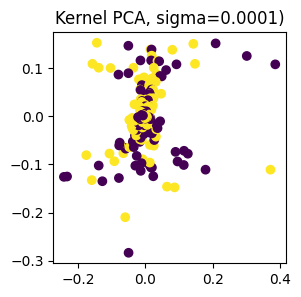

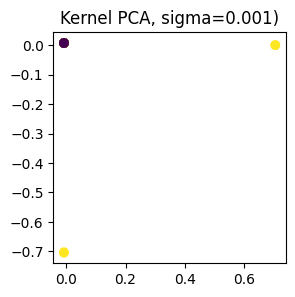

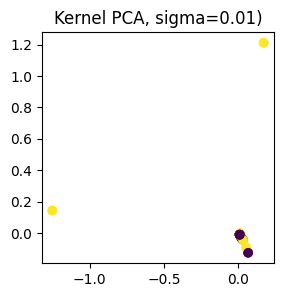

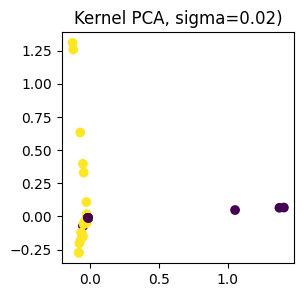

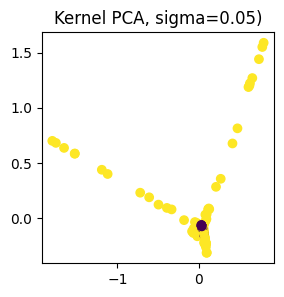

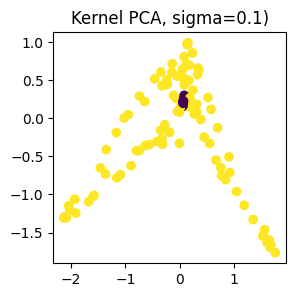

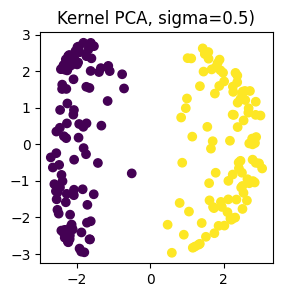

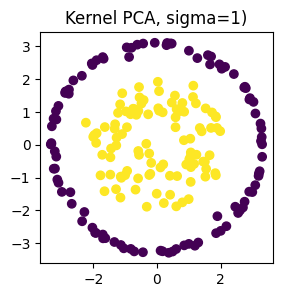

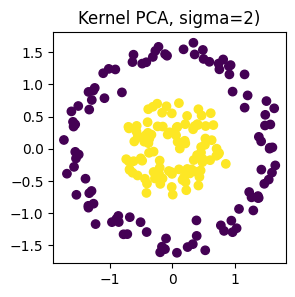

In [39]:
sigmas_to_test= [0.0001,0.001, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 2]

for sigma in sigmas_to_test:
    K = rbf(X, sigma)
    K_tilde = kernel_matrix(X, K)
    projections = eigen_decomp(K_tilde, 2)
    
    plt.figure(figsize=(3,3))
    plt.title(f"Kernel PCA, sigma={sigma})")
    plt.scatter(projections[:, 0], projections[:, 1], c=Y)
    plt.show()